For this practical work, will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.





#### Import numpy, matplotlib.pyplot and make it inline

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [ ]:
a = -2 
b = 1
X= np.linspace(0, 20 )
x= np.linspace(0, 20 )

x=x.reshape(len(x) , 1)
print(x.shape)
y = np.multiply(x,a) + b 
y=x.reshape(len(y) , 1)
print(y.shape)

(50, 1)
(50, 1)


In [ ]:
ones=np.ones(len(x))
ones = ones.reshape(len(ones),1)
print(ones.shape)

(50, 1)


In [ ]:

x= np.concatenate((ones,x), axis=1)

In [ ]:
x.shape

(50, 2)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.

#### The function should take the following input parameters:

##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations

#### The function should return the following:

##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1

#### Note: you can choose any suitable stop criteria.

#### Try your function with any input parameterss of your choice.

In [ ]:
def compute_cost(x,y,theta):
#     print("theta " , theta)
#     print("cost val",(np.sum(  np.power( ( (x @ theta.T) - y ), 2 )  ))  / (2*len(x)) )
    return ((np.sum(  np.power( ( (x @ theta.T) - y ), 2 )  ))  / (2*len(x)) )
  

In [ ]:
def copmute_gradient(x,y,alpha,iterations):
    
    theta =np.array([0,0]).reshape(1,2)

    cost_list = np.zeros(iterations+1)
    cost_list [0] = compute_cost(x, y, theta) 
    #list_theta=[np.zeros(theta.shape)]
    list_theta = np.array([[0,0]])
    theta_values = np.zeros(theta.shape).reshape(1,2)

#     print(list_theta)
    stp=iterations

    for i in range (iterations) : 
        gradient_error =  (x @theta.T ) - y 
       # print(gradient_error.shape)
        
    # iterate on parameters (theta 0 , theta 1)\
#         print(theta)
 
        for j in range(theta.shape[1]):
#             print(theta.shape)
        
        
            deriv =  np.multiply ( gradient_error , x[: , j] )

            sum_part = (np.sum(deriv) * (alpha /len(x) ))
                
            theta_values[0,j] = theta_values[0,j] - ( (alpha /len(x)) * np.sum(deriv))

        
        theta = theta_values
        list_theta = np.append(list_theta , theta.reshape(1,-1), axis=0 )
        


#         print("theata" ,theta)
#         print("list_theta",np.array(list_theta).reshape(-1,2))
#         print( compute_cost(x, y, theta))

        cost_list[i+1] = compute_cost(x, y, theta)
        if(abs( cost_list[i] - cost_list[i-1]) <= 0.1):
            stp=i
            print("iterations",stp)
            break
    
    return theta, cost_list[0:stp] ,np.array(list_theta[0:stp]).reshape(-1,2)  
     


In [ ]:
# initialize variables for learning rate and iterations
alpha = 0.00004
iterations = 100


# perform gradient descent to "fit" the model parameters

theta, cost_list , list_theta  = copmute_gradient(x,y,alpha,iterations)

print('theta' , theta)

# print('cost list  = ' ,cost_list[0:50] )

print(list_theta.shape)

# print(cost_list.sh/ape)


iterations 14
theta [[0.09565467 0.95654673]]
(14, 2)


In [ ]:

# get prediction on training data
prdection = x @ theta.T
# prdection = theta[0, 0] + (theta[0, 1] * x[:,1])                                     
print(y.shape)
prdection=prdection.reshape(len(prdection),1)
print(prdection.shape)


(50, 1)
(50, 1)


#### Plot the best regression line

Text(0, 0.5, 'Y')

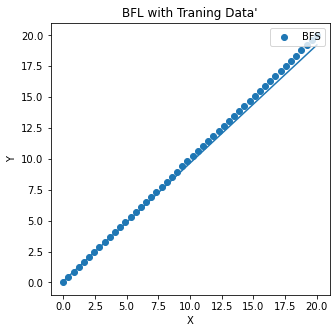

In [ ]:

# draw the Best Fiting line 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
plt.plot (X, prdection)
ax.scatter(X, y, label='BFS' )
plt.title("BFL with Traning Data'")
ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


#### Plot loss vs. epochs

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

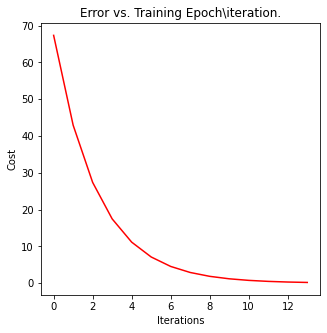

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [ ]:
theta_0 = list_theta[: , 0].reshape(-1,1)
theta_1 = list_theta[: , 1].reshape(-1,1)

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

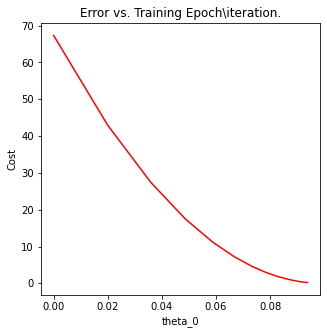

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_0,cost_list ,  'r')
ax.set_xlabel('theta_0')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

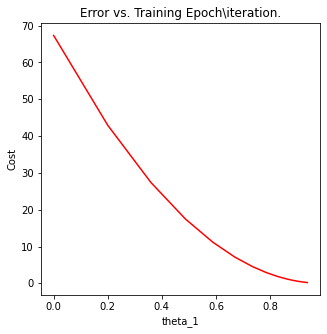

In [ ]:

# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_1, cost_list ,  'r')
ax.set_xlabel('theta_1')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


#### Plot all regression lines till converge

Text(0, 0.5, 'Y')

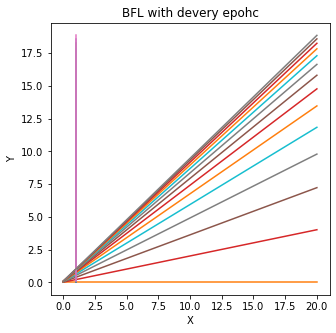

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
for theta in  list_theta :
#     print(theta,theta.shape)
    theta=theta.reshape(1,-1)
#     print(theta,theta.shape)
#     p= t[0, 0] + (t[0, 1] * x[:,1])
    ax.plot(x,( (x @ theta.T) ) , label='BFL')
    plt.title("BFL with devery epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


#### Calculate r2 score

In [ ]:
x_test = np.linspace(5,25, 50)

y_test = np.multiply(x_test,a) + b 
y_test=y_test.reshape(len(y_test),1)
x_test=y_test.reshape(len(x_test),1)


In [ ]:

# print(x_test)

# get prediction on training data
prdection2 = theta[0, 0] + (theta[0, 1] * x_test)
                                           
prdection2=prdection2.reshape(len(prdection2),1)
# print(x_data.shape)
# print(prdection2.shape)
from sklearn.metrics import r2_score
print(r2_score(y_test,prdection2))

0.9698267577902677


### Accuracy on un seen data is well 

In [ ]:

# # draw the Best Fiting line 
# import matplotlib.pyplot as plt 
# fig, ax = plt.subplots(figsize=(5,5))
# plt.plot (x_test, prdection2,color='r')
# ax.scatter(x_test, y, label='BFS' )
# plt.title("BFL with Traning Data'")
# ax.legend(loc=1)

# ax.set_xlabel('X')

# ax.set_ylabel('Y')


## Here I tried with lr 0.0001  and the fitting on training data is very well But on a different data that is un seen in training the fitting is so bad 

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [ ]:
# initialize variables for learning rate and iterations
alpha = 0.0001
iterations = 100


# perform gradient descent to "fit" the model parameters

theta, cost_list , list_theta  = copmute_gradient(x,y,alpha,iterations)

print('theta' , theta)

# print('cost list  = ' ,cost_list[0:50] )

print(list_theta.shape)

# print(cost_list.sh/ape)


iterations 6
theta [[0.09828893 0.98288935]]
(6, 2)


In [ ]:

# get prediction on training data
prdection2= x @ theta.T
# prdection = theta[0, 0] + (theta[0, 1] * x[:,1])                                     
print(y.shape)
prdection=prdection2.reshape(len(prdection2),1)
print(prdection2.shape)


(50, 1)
(50, 1)


Text(0, 0.5, 'Y')

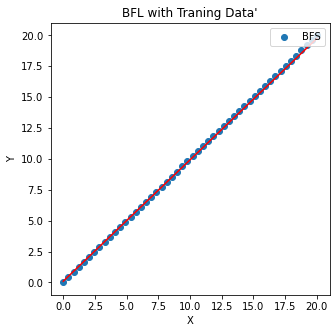

In [ ]:

# draw the Best Fiting line 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
plt.plot (X, prdection2,color='r')
ax.scatter(X, y, label='BFS' )
plt.title("BFL with Traning Data'")
ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


Text(0, 0.5, 'Y')

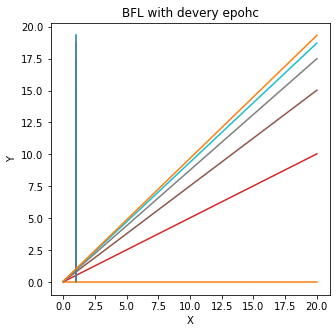

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
for theta in  list_theta :
#     print(theta,theta.shape)
    theta=theta.reshape(1,-1)
#     print(theta,theta.shape)
#     p= t[0, 0] + (t[0, 1] * x[:,1])
    ax.plot(x,( (x @ theta.T) ) , label='BFL')
    plt.title("BFL with devery epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


In [ ]:
x_test2 = np.linspace(5,25, 50)

y_test = np.multiply(x_test2,a) + b 
y_test=y_test.reshape(len(y_test),1)
x_test2=x_test2.reshape(len(x_test2),1)

# print(x_test)

# get prediction on training data
prdect = theta[0, 0] + (theta[0, 1] * x_test2)
                                           
prdect=prdect.reshape(len(prdect),1)
# print(x_data.shape)
# print(prdection2.shape)


In [ ]:

from sklearn.metrics import r2_score
print(r2_score(y_test,prdect))

-14.83061037434795


Text(0, 0.5, 'Y')

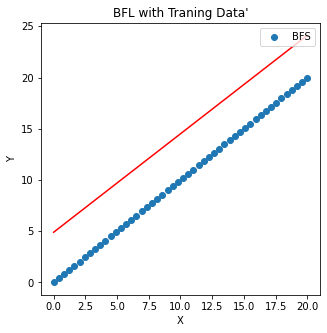

In [ ]:

# draw the Best Fiting line 
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
plt.plot (X, prdect,color='r')
ax.scatter(X, y, label='BFS' )
plt.title("BFL with Traning Data'")
ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

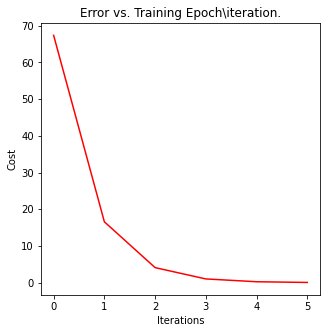

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


In [ ]:
theta_0 = list_theta[: , 0].reshape(-1,1)
theta_1 = list_theta[: , 1].reshape(-1,1)

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

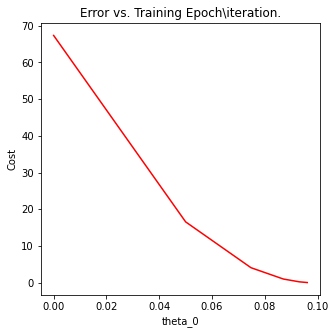

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_0,cost_list ,  'r')
ax.set_xlabel('theta_0')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')



Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

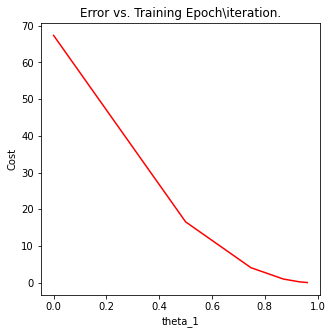

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_1, cost_list ,  'r')
ax.set_xlabel('theta_1')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


# Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [ ]:
a = -2 
b = 1
X_data= np.linspace(0, 20 )
x_data= np.linspace(0, 20 )

x_data=x_data.reshape(len(x_data) , 1)
print(x_data.shape)
y_data = np.multiply(x_data,a) + b 
y_data=y_data.reshape(len(y) , 1)
print(y_data.shape)

(50, 1)
(50, 1)


In [ ]:
print(x_data[0].shape)

(1,)


In [ ]:
ones=np.ones(len(x))
ones = ones.reshape(len(ones),1)
print(ones.shape)
x_data= np.concatenate((ones,x_data), axis=1)
# x_data

(50, 1)


In [ ]:
def compute_cost1(x,y,theta):
    print("theta " , theta.shape)
    print("theta " , x.shape)
    print("theta " , y.shape)
    
    
#     print("cost val",(np.sum(  np.power( ( (x @ theta.T) - y ), 2 )  ))  / (2*len(x)) )
    return ((np.sum(  np.power( ( (x @ theta) - y ), 2 )  ))  / (2*len(x)) )
  

In [ ]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =10):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history =[]
    n_batches = int(m/batch_size)
    list_theta=[]
            break
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
#             /X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost = compute_cost1(X_i,y_i,theta)
            cost_history.append(cost)
            list_theta.append(theta)
            
        
    return np.array(list_theta).reshape(-1,2), np.array(cost_history).reshape(-1,1)

In [ ]:
lr =0.005
n_iter = 100

theta = np.random.randn(2,1)


thetas,cost_history = minibatch_gradient_descent(x_data,y_data,theta,lr,n_iter)


# print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
# print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
theta  (10, 1)
theta  (2, 1)
theta  (10, 2)
the

Text(0, 0.5, 'Y')

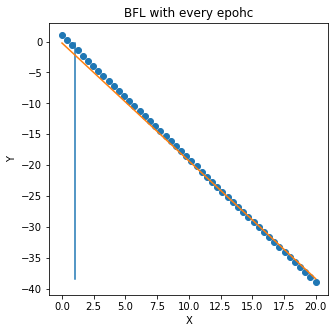

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
theta = thetas [-1]
#     print(theta,theta.shape)
thetat=thetat.reshape(1,-1)
#     print(theta,theta.shape)
#     p= t[0, 0] + (t[0, 1] * x[:,1])
ax.scatter(x[:,1], y_data, label='BFS' )

ax.plot(x,( (x @ theta.T) ) , label='BFL')
plt.title("BFL with every epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

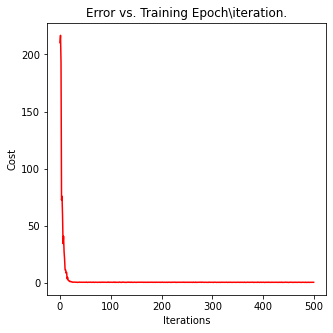

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


Text(0, 0.5, 'Y')

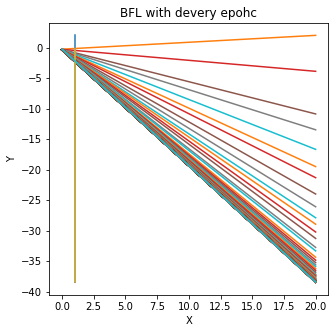

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
for theta in  thetas :
#     print(theta,theta.shape)
    theta=theta.reshape(1,-1)
#     print(theta.shape)
#     print(x.shape)
    
#     p= t[0, 0] + (t[0, 1] * x[:,1])
    ax.plot(x,( (x @ theta.T) ) , label='BFL')
    plt.title("BFL with devery epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


In [ ]:
# draw error graph
# draw error graph
theta_0 = thetas[: , 0].reshape(-1,1)
theta_1 = thetas[: , 1].reshape(-1,1)





Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

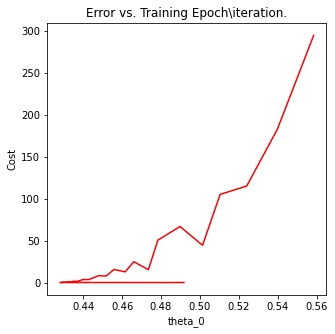

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_0,cost_history ,  'r')
ax.set_xlabel('theta_0')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration.')

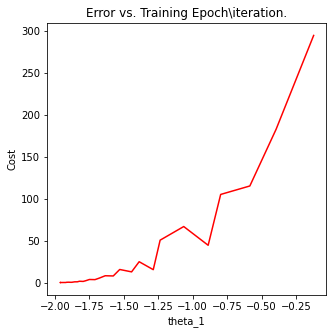

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot( theta_1, cost_history ,  'r')
ax.set_xlabel('theta_1')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration.')


In [ ]:
prdect =  x_data @ list_theta[-1]
                                           
prdect=prdect.reshape(len(prdect),1)
from sklearn.metrics import r2_score
print(r2_score(y_data,prdect))

0.9966285552049715


# Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [ ]:
def copmuteSGD_gradient(X,y,alpha,iterations):
    
    theta =np.array([0,0]).reshape(1,2)

#     cost_list = np.zeros(len(y)*iterations)
    cost_list=[]
    cost=0
    list_theta = np.array([[0,0]])
    stp=iterations*len(y)
    m=len(y)
    
    for j in range (1,iterations) : 
        cost=0

        
        for i in range(1,m):
        
#             rand_ind = np.random.randint(0,m)
#             print(X[i],X[i].shape)
            X_i = X[i].reshape(1,-1)
            y_i = y[i].reshape(1,1)
            prediction = np.dot(X_i,theta.T)
            
            gradient_error =  (X_i @ theta.T ) - y_i 
            gradient_error= np.dot(gradient_error.T , X_i )
        
            theta = theta - ( (alpha /1) * gradient_error )
            list_theta = np.append(list_theta , theta.reshape(1,-1), axis=0 )
#             print(list_theta)
            
            cost= compute_cost(X_i,y_i,theta)

            cost_list.append(cost)
        if j>2:
            if(abs( cost_list[-1] - cost_list[-m]) <= 0.1):

                break
    return theta, cost_list ,np.array(list_theta).reshape(-1,2)  





In [ ]:
# initialize variables for learning rate and iterations
alpha = 0.0009
iterations = 100


# perform gradient descent to "fit" the model parameters

theta, cost_list , list_theta  = copmuteSGD_gradient(x_data,y_data,alpha,iterations)

# print('theta' , theta)

# print('cost list  = ' ,cost_list[-1] )

cost_list_v2=np.array(cost_list)
# print(cost_list_v2.shape)
cost_list_v2.reshape(-1,1)
# print(cost_list.sh/ape)


array([[1.68325696e-02],
       [1.99664157e-01],
       [1.04376859e+00],
       [2.53775046e+00],
       [4.65975591e+00],
       [7.37397864e+00],
       [1.06276668e+01],
       [1.43488800e+01],
       [1.84452693e+01],
       [2.28041493e+01],
       [2.72940942e+01],
       [3.17682128e+01],
       [3.60691432e+01],
       [4.00356539e+01],
       [4.35105650e+01],
       [4.63495153e+01],
       [4.84299376e+01],
       [4.96594726e+01],
       [4.99829992e+01],
       [4.93874893e+01],
       [4.79040311e+01],
       [4.56066042e+01],
       [4.26075076e+01],
       [3.90497074e+01],
       [3.50967396e+01],
       [3.09211049e+01],
       [2.66923004e+01],
       [2.25656803e+01],
       [1.86732343e+01],
       [1.51171149e+01],
       [1.19663741e+01],
       [9.25695296e+00],
       [6.99456344e+00],
       [5.15978137e+00],
       [3.71447607e+00],
       [2.60865946e+00],
       [1.78693303e+00],
       [1.19391346e+00],
       [7.78275256e-01],
       [4.95309730e-01],


In [ ]:
prdect =  x_data @ theta.T 
                                           
prdect=prdect.reshape(len(prdect),1)
from sklearn.metrics import r2_score
print(r2_score(y_data,prdect))

0.9966285552049715


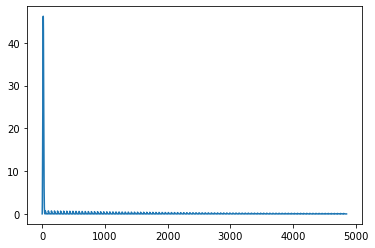

In [ ]:
plt.plot(cost_list_v2)

Text(0, 0.5, 'Y')

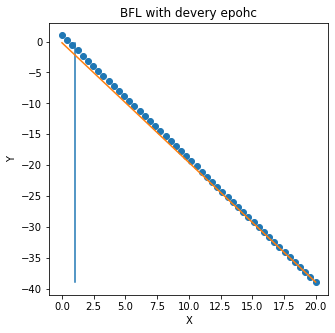

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
thetat = list_theta [-1]
#     print(theta,theta.shape)
thetat=thetat.reshape(1,-1)
#     print(theta,theta.shape)
#     p= t[0, 0] + (t[0, 1] * x[:,1])
ax.scatter(x[:,1], y_data, label='BFS' )

ax.plot(x,( (x @ thetat.T) ) , label='BFL')
plt.title("BFL with devery epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


Text(0, 0.5, 'Y')

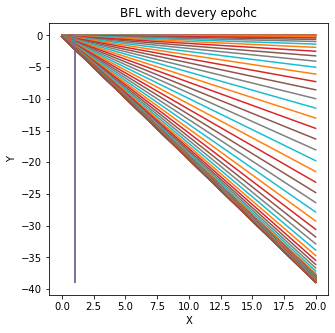

In [ ]:

# draw the line

import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(5,5))
for theta in  list_theta :
#     print(theta,theta.shape)
    theta=theta.reshape(1,-1)
#     print(theta,theta.shape)
#     p= t[0, 0] + (t[0, 1] * x[:,1])
    ax.plot(x,( (x @ theta.T) ) , label='BFL')
    plt.title("BFL with devery epohc")

#     break
    

#ax.legend(loc=1)

ax.set_xlabel('X')

ax.set_ylabel('Y')


In [ ]:
x_data.shape

(50, 2)

In [ ]:
prdect =  x_data @ theta 
                                           
prdect=prdect.reshape(len(prdect),1)
from sklearn.metrics import r2_score
print(r2_score(y_data,prdect))

0.9994170649708818


In [ ]:
# y_data

In [ ]:
# prdect